<a href="https://colab.research.google.com/github/Raquelll77/tarea2.2_IA/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv('./housing.csv')

datos = df.dropna()

# datos dummies

dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

#concatenar al DF los dumies extraidos de la proximidad al oceano
datos = pd.concat([datos, dummies], axis=1)

datos.drop('ocean_proximity', axis=1, inplace=True) #afectar el DF original

datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms'] # la relación entre las habitaciones


# obtener las caracteristicas y la etiqueta

# caracteristicas de entrada
X = datos.drop('median_house_value', axis=1) #axis = 1, para eliminar la columna

#etiqueta
y = datos['median_house_value']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()

#entrenamiento
modelo.fit(X_train, y_train)

#X_test: son datos que el modelo no ha vidsto nunca
predicciones = modelo.predict(X_test)


comparativa = {"predicciones":predicciones, "valor real": y_test}
result = pd.DataFrame(comparativa)
result


modelo.score(X_test, y_test)




0.6712589177423762

In [18]:
modelo.score(X_train, y_train)

1.0

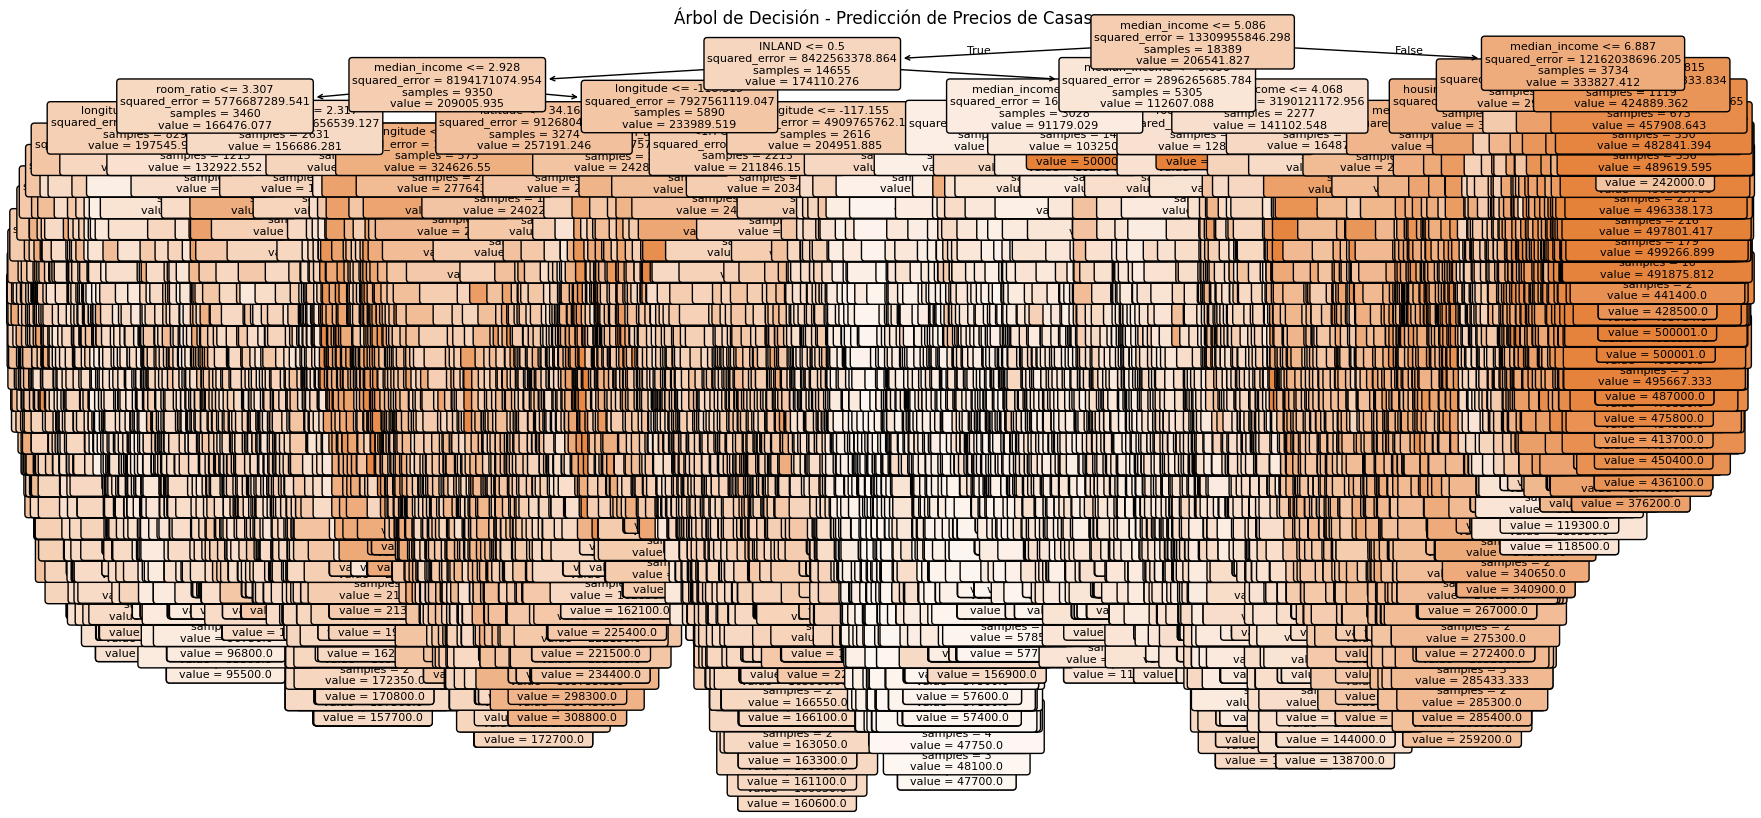

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ajusta el tamaño de la figura según la profundidad del árbol y el número de características
plt.figure(figsize=(20, 10))  # Ajusta el tamaño según tus preferencias
plot_tree(
    modelo,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol de Decisión - Predicción de Precios de Casas")
plt.show()

